,train_score,test_score,n_trees,max_depth,max_leaf_nodes,min_samples_leaf
0,91.254753,89.772727,5.0,6.0,10.0,7.0


,g,b
0,0.95,0.05
1,0.98,0.02
2,0.95,0.05
3,0.17,0.83
4,0.00,1.00
5,0.99,0.01


Text(0, 0.5, 'Признак 26')

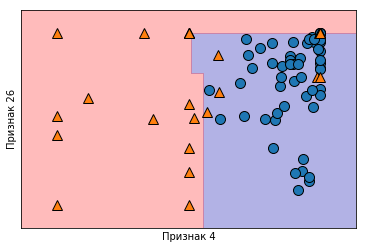

In [5]:

from sklearn.model_selection import train_test_split
import mglearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = np.loadtxt('work4/ionosphere.csv', delimiter=';', unpack=False)
X = data[:, [4,26]]
y = data[:, 34:35]
y = y.reshape(351)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)

# ансамбль деревьев
params = ['train_score', 'test_score', 'n_trees', 'max_depth', 'max_leaf_nodes', 'min_samples_leaf']
resuts = []
def add_results(forest):
    resuts.append([forest.score(X_train, y_train)*100,  
                   forest.score(X_test, y_test)*100,
                   forest.n_estimators,
                   forest.max_depth,
                   forest.max_leaf_nodes,
                   forest.min_samples_leaf])
    
def my_forest(n_trees, max_dept, max_leaf_node, min_sample_leaf):
    forest = RandomForestClassifier(n_estimators=n_trees, max_depth=max_dept, max_leaf_nodes=max_leaf_node, min_samples_leaf=min_sample_leaf, random_state=1)
    forest.fit(X_train, y_train)
    add_results(forest)
    return forest
    
forest5 = my_forest(n_trees = 5, max_dept=6, max_leaf_node=10, min_sample_leaf=7)
    
np_resuts = np.array(resuts)
data_pd = pd.DataFrame(np_resuts)
data_pd.columns = params
display(data_pd)


np_resuts = np.array(np.around(forest5.predict_proba(X_test[:6]), decimals=2))
data_pd = pd.DataFrame(np_resuts)
data_pd.columns = ['g','b']
display(data_pd)

mglearn.plots.plot_2d_separator(forest5, X_test, fill = True, alpha = 0.3)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)
plt.xlabel("Признак 4")
plt.ylabel("Признак 26")
